## COMPUTATIONAL INTELLIGENCE 1
#### Assignment 1
#### Student: Vishnevskiy Mark

In [154]:
# python preparations

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
import numpy.linalg as LA

## Task 1

### Task 1.1

Step 1.\
Obtain null space of vectors V and W. With them we can find constants A, B and C in cartesian plane equation:
$A(x-x_0)+B(y-y_0)+C(z-z_0)=0$.

Step 2.\
With cross product of vectors V and W we can obtain planes normal vectors and normalize it by 1.

Step 3.\
With dot pruduct of normal vectors we can calculate the angle between vectors. If this angle is equal to 0 or 180, it means that planes are not intersected.

In [155]:
N = 1000
x, y = np.meshgrid(np.linspace(-10,10,N), np.linspace(-10,10,N))

In [156]:
def cartesian_eq(null_space, p):
    A, B, C = null_space
    if np.abs(C) >= 1e-10:
        z = -(A * (x - p[0,0]) + B * (y - p[0,1])) / C  + p[0,2]
    else:
        z, _ = np.meshgrid(np.linspace(p[0,2], p[0,2], N), np.linspace(p[0,2], p[0,2], N))
    return z

def solution_1_1(norm1, norm2, p1, p2):
    dot_product = np.linalg.norm(np.dot(norm1[0],norm2[0]))
    if np.abs(dot_product - 1) <= 0.02 and p1.all() == p2.all():
        return "parallel planes"
    elif np.abs(dot_product - 1) <= 0.02 and p1.all() != p2.all():
        return "equal planes"
    else: 
        return "intersected planes"
    

Case 1:

In [157]:
# initial values 
v1 = np.array([[1, 9, 2]])
w1 = np.array([[1, 6, 8]])
p1 = np.array([[-4, -2, 0]])

v2 = np.array([[1, 2, 3]])
w2 = np.array([[4, 5, 6]])
p2 = np.array([[7, 8, 9]])

# null spaces
nu1 = linalg.null_space(np.vstack([v1, w1]))
nu2 = linalg.null_space(np.vstack([v2, w2]))

# normal vectors
no1 = np.cross(v1, w1)/LA.norm(np.cross(v1, w1))
no2 = np.cross(v2, w2)/LA.norm(np.cross(v2, w2))

intersected planes


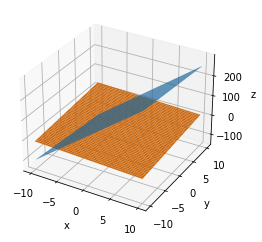

In [158]:
print(solution_1_1(nu1, nu2, no1, no2))
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, cartesian_eq(nu1, p1))
ax.plot_surface(x, y, cartesian_eq(nu2, p2))
plt.show()

Case 2:

In [159]:
# initial values 
v1 = np.array([[1, 9, 2]])
w1 = np.array([[1, 6, 8]])
p1 = np.array([[-4, -2, 0]])


v2 = np.array([[1, 9, 2]])
w2 = np.array([[1, 6, 8]])
p2 = np.array([[1, 3, 7]])

# null spaces
nu1 = linalg.null_space(np.vstack([v1, w1]))
nu2 = linalg.null_space(np.vstack([v2, w2]))

# normal vectors
no1 = np.cross(v1, w1)/LA.norm(np.cross(v1, w1))
no2 = np.cross(v2, w2)/LA.norm(np.cross(v2, w2))

parallel planes


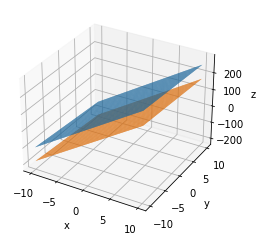

In [160]:
print(solution_1_1(nu1, nu2, no1, no2))
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, cartesian_eq(nu1, p1))
ax.plot_surface(x, y, cartesian_eq(nu2, p2))
plt.show()

### Task 1.2

In [161]:
# initial values 
v1 = np.array([[1, 7, 4]])
w1 = np.array([[2, 8, -5]])
p1 = np.array([[0, 1, 0]])

v2 = np.array([[-2, -2, 1]])
w2 = np.array([[5, 5, -5]])
p2 = np.array([[-1, 0, 0]])

# null spaces
nu1 = linalg.null_space(np.vstack([v1, w1]))
nu2 = linalg.null_space(np.vstack([v2, w2]))

# normal vectors
no1 = np.cross(v1, w1)/LA.norm(np.cross(v1, w1))
no2 = np.cross(v2, w2)/LA.norm(np.cross(v2, w2))

In [162]:
def cartesian_eq_2(norm, p):
    A, B, C = norm[0][0], norm[0][1], norm[0][2]
    if np.abs(C) >= 1e-10:
        z = -(A * (x - p[0,0]) + B * (y - p[0,1])) / C  + p[0,2]
    else:
        z, _ = np.meshgrid(np.linspace(p[0,2], p[0,2], N), np.linspace(p[0,2], p[0,2], N))
    return z

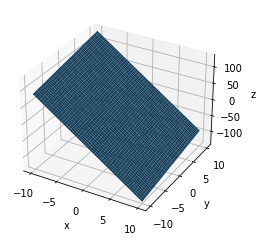

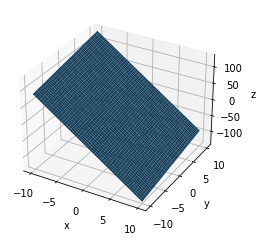

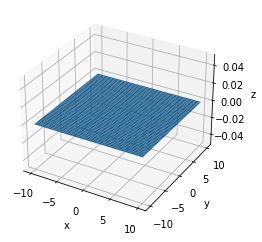

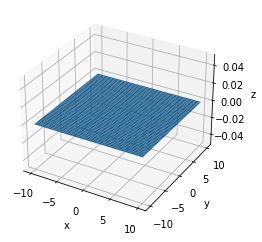

In [163]:
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, cartesian_eq(nu1, p1))
plt.show()
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, cartesian_eq_2(no1, p1))
plt.show()
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, cartesian_eq(nu2, p2))
plt.show()
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, cartesian_eq_2(no2, p2))
plt.show()

### Task 1.3

Point projection on the line is the dot product of vector through origin to this point and a unit vector directed through the given line. Unit vector through the line $l$ is equal to our obtained normal vector.

In [164]:
# initial values 
v = np.array([[1, 1, -5]])
w = np.array([[-2, 3, 3]])
p = np.array([[2, 2, 2]])
g = np.array([[-10, -3, 5]])

no = np.cross(v, w)/LA.norm(np.cross(v, w))

print(f'projection: {np.dot(g[0], no[0])}')
print()
print(f'line equation in parametric form:\n\tx = {no[0,0]} * t, y={no[0,1]} * t, z={no[0,2]} * t')

projection: -8.822082845260704

line equation in parametric form:
	x = 0.9022584728107539 * t, y=0.3508782949819598 * t, z=0.25062735355854276 * t


### Task 1.4

![](a1-1-4.png)

In [165]:
# initial values 
v = np.array([[4,2,-1]])
w = np.array([[1,0,0]])
p = np.array([[-5,11,0.5]])
g = np.array([[-10, -3, 5]])

no = np.cross(v, w)/LA.norm(np.cross(v, w))

# perpendicular projection of g on plane:
g_perpendicular = np.dot(g[0]-p[0],no[0])
g_sym = g - 2 * g_perpendicular * no

print("Symetrical point coordinates: ", g_sym)

Symetrical point coordinates:  [[-10.  -1.   9.]]


Plot part:

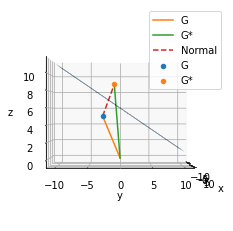

In [166]:
ax = plt.subplot(projection='3d')

# surface:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, cartesian_eq_2(no, p), alpha = 1)

# g:
ax.plot([0,g[0,0]], [0,g[0,1]], [0,g[0,2]], label = "G")
# g symmetrical:
ax.plot([0,g_sym[0,0]], [0,g_sym[0,1]], [0,g_sym[0,2]],label = "G*")

# normal:
ax.plot(
    [g[0,0],g[0,0]-4.5*no[0,0]],
    [g[0,1],g[0,1]-4.5*no[0,1]],
    [g[0,2],g[0,2]-4.5*no[0,2]],
    '--', label = "Normal")

ax.scatter(g[0,0],g[0,1],g[0,2], label = "G")
ax.scatter(g_sym[0,0],g_sym[0,1],g_sym[0,2], label = "G*")

ax.view_init(elev=0, azim=0)
plt.legend()
plt.show()

## Task 2

### Task 2.1

## Task 3

### Task 3.1

### Task 3.2

In [8]:
import cvxpy as cp

x1, x2 = cp.Variable(), cp.Variable()
f = cp.Minimize((1/2)*x1**2 + 4*x2**2 - 32*x2 + 60)
constrains = [x1 + x2 <= 6,
             x1 + 2 * x2 <= 8,
             x1 >= 0, x2 >= 0, x2 <= 9]

prob = cp.Problem(f, constrains)
result = prob.solve()

print("The min value of the function with constrains:", result)
print("The optimal values for x:", x1.value.round(), x2.value.round())

The min value of the function with constrains: -4.0
The optimal values for x: -0.0 4.0


In [2]:
import numpy as np

H = np.array([[1, 0], [0, 8]])
c = np.array([0, -32])
c0 = 60
A = np.array([[1, 1], [1, 2], [-1, -1], [0, 1]])
b = np.array([6, 8, 0, 9])


x = cp.Variable(2)
f = cp.Minimize((1/2)*cp.quad_form(x, H) + c @ x + c0)
constrains = [A @ x <= b]

prob = cp.Problem(f, constrains)
result = prob.solve()

print("The min value of the function with constrains:", result)
print("The optimal values for x:", x.value[0], x.value[1])

The min value of the function with constrains: -4.0
The optimal values for x: 0.0 4.0


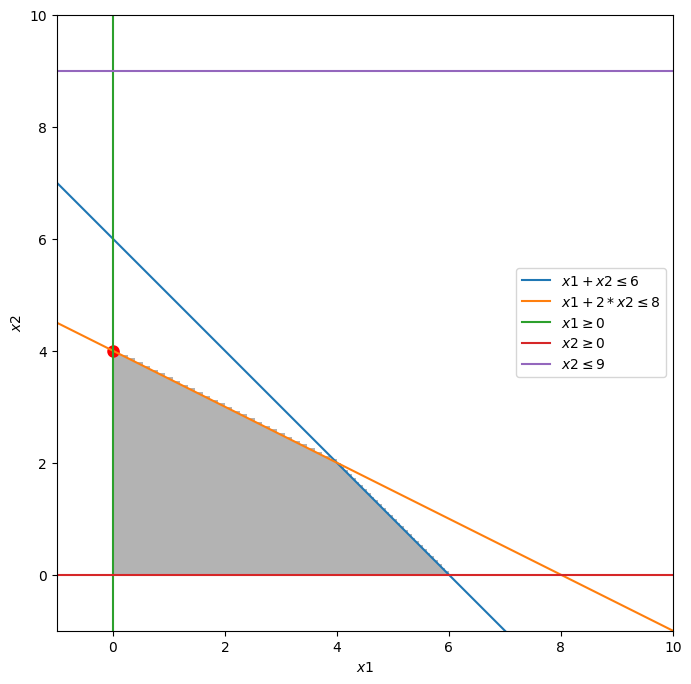

In [13]:
import matplotlib.pyplot as plt

d = np.linspace(0, 20, 300)
x1, x2 = np.meshgrid(d,d)
plt.imshow( ((x1 + x2 <=6) & (x1 + 2*x2<=8) & (x1>=0) & (x2>=0) & (x2<=9)).astype(int) ,
                extent=(x1.min(),x1.max(),x2.min(), x2.max()),origin="lower", cmap="Greys", alpha = 0.3);

x1 = np.linspace(-1, 10, 100)

# Plot the lines defining the constraints
plt.plot(x1, 6 - x1, label=r'$x1+x2\leq6$')
plt.plot(x1, (8 -x1)/2, label=r'$x1+2*x2\leq8$')
plt.plot(np.zeros_like(x1), x1, label=r'$x1\geq0$')
plt.plot(x1, np.zeros_like(x1), label=r'$x2\geq0$')
plt.plot(x1, 9*np.ones_like(x1), label=r'$x2\leq9$')
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.legend()
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

# Plot a solution
plt.scatter(x.value[0], x.value[1], color='r', linewidth=3, label='solution');

-4.0


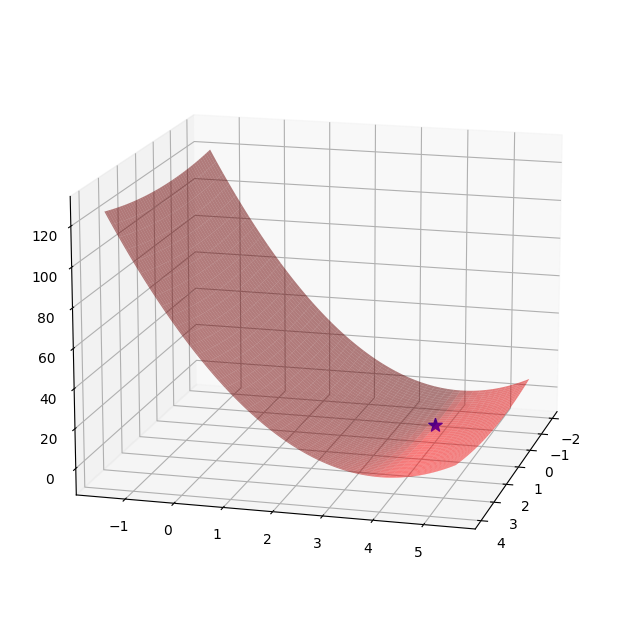

In [19]:
xx = np.linspace(-2,4,100)
yy= np.linspace(-1.5,5.5,100)

X,Y = np.meshgrid(xx,yy)
Z= 1/2*X**2 + 4 * Y**2 - 32 * Y + c0
point_z= 1 / 2 * x.value[0] ** 2 + 4 * x.value[1] ** 2 - 32 * x.value[1] + c0
print('Optimal point at: ',point_z)

fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, color='r', alpha=0.5)
ax.scatter([x.value[0]], [x.value[1]], [point_z], s=100, marker="*", color='blue')
ax.view_init(15,15)
plt.show()